In [39]:
import sys
sys.path.insert(0, '../../gaps_topology/Tilings') # prepend the path to the Tilings package
import Tilings as tl
import AB_envs as envs
import networkx as nx

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# replace inline by %matplotlib notebook for full interactivity (but beware of the flickering!)
%matplotlib inline

"""
Styling
See: http://matplotlib.org/users/customizing.html

TeX rendering:
You can use TeX to render all of your matplotlib text if the rc
parameter text.usetex is set.  This works currently on the agg and ps
backends, and requires that you have tex and the other dependencies
described at http://matplotlib.org/users/usetex.html
properly installed on your system.  The first time you run a script
you will see a lot of output from tex and associated tools.  The next
time, the run may be silent, as a lot of the information is cached in
~/.tex.cache
"""
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern'], 'size':16})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
# colors
BostonBlue = np.array([0., 104., 139.])/255
comp = np.array([200., 35., 0.])/255
# linewidth of plots
rc('lines', lw = 2)
# fontsize of the labels
rc('axes', labelsize = 16)
# bbox='tight' tries to make the bounding box fit the plot area
# pad_inches is the distance between the bounding box and the plot area
# see http://matplotlib.org/users/tight_layout_guide.html
rc('savefig', bbox = 'tight', pad_inches = .1)

# Multifractal formalism

In [40]:
"""
A modified version of the Legendre transform, adapted to concave functions (such as $\tau_q$)
"""

q = np.arange(0., 10., .01)
fib = 0.5*(1.+np.sqrt(5))
fib = 100*fib
# tau function for the spectrum of the Fibonacci chain in perturbation theory rho << 1
rho = 0.5
tau = lambda q: -np.log(fib**q*(np.sqrt(1.+fib**q)-1.))/np.log(rho)
# a custom tau function: rotated tanh function
theta = -0.5
c = np.cos(theta)
s = np.sin(theta)
def taut(t):
    if t>0:
        y = -s*t + c*np.tanh(t)
    else:
        y = -s*t + c*t
    return y
def qt(t):
    if t>0:
        x = c*t + s*np.tanh(t)
    else:
        x = c*t + s*t
    return x

def tangent(t):
    return c*t + s*t

# vectorize
taut = np.vectorize(taut)
qt = np.vectorize(qt)
tangent = np.vectorize(tangent)
# t range
t = np.arange(-.5, 2., 0.1)

# figure configuration
fig, ax = plt.subplots(1,1)

ax.plot(qt(t), taut(t), c=BostonBlue)
# tangent curve
ax.plot(qt(t), 1.8*qt(t)+.29, '--', c=comp)
# style
ax.set_xlabel(r"$q$")
ax.set_ylabel(r"$\tau_q$")
plt.savefig('tau_legendre_transform.svg')#, bbox_inches='tight', pad_inches=0)

# Fractal dimensions of the periodic chain

In [41]:
def dp(q):
    """
    Return the fractal dimensions of the periodic chain
    """
    d = 1.
    if q > 2:
        d = q/(2.*(q-1.))
    return d
dp = np.vectorize(dp)

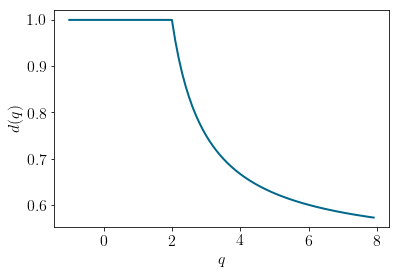

In [42]:
# figure configuration
fig, ax = plt.subplots(1,1)

# a range of q values
q = np.arange(-1,8,0.1)
# plot
ax.plot(q, dp(q), c=BostonBlue)
# style
ax.set_xlabel(r"$q$")
ax.set_ylabel(r"$d(q)$")
plt.savefig('../img1/fractal_spectrum_periodic.pdf')

# Fractal dimensions of the Fibonacci chain

In [43]:
# golden ratio
gold = (1.+np.sqrt(5))*0.5
def dfib(rho, q):
    """
    This perturbative formula assumes 1/\log(\rho) << 1/\log(\rho)^2;
    in particular it does not work if rho >= 0.37
    """
    d = np.log(gold**q*(np.sqrt(1+gold**q)-1))
    d /= np.log(rho)
    d /= 1-q
    return d

dfib = np.vectorize(dfib)

In [44]:
# figure configuration
fig, ax = plt.subplots(1,1)

# a range of q values
q = np.arange(-60,100,0.1)
# plot
ax.plot(q, dfib(0.3, q), c=BostonBlue)
# style
ax.set_xlabel(r"$q$")
ax.set_ylabel(r"$d(q)$")
plt.savefig('../img1/fractal_spectrum_fibo.pdf')

# DoS of the periodic chain

In [45]:
def dosp(e):
    """
    Density of states of the periodic chain at energy e = E/t
    """
    return 1./(2*np.pi*np.sqrt(1. - 0.25*e**2.))

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide


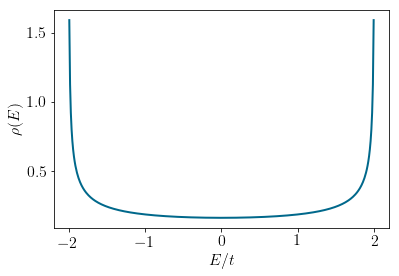

In [46]:
# figure configuration
fig, ax = plt.subplots(1,1)

# a range of q values
e = np.arange(-2,2,0.01)
# plot
ax.plot(e, dosp(e), c=BostonBlue)
# style
ax.set_xlabel(r"$E/t$")
ax.set_ylabel(r"$\rho(E)$")
plt.savefig('../img1/dos_periodic.pdf')